# You can eat healthy at McDonald's.

**Introduction**

Coronary Heart Disease and Diabetes are the major beasts of modern society occured due to an unbalanced diet filled up with the sugarish and fatty food. **Thus, we will explore not just the individual effects of Sugar and Fat, but the combination of those nutrients that poses the greater danger.**

[The Evidence for Saturated Fat and for Sugar Related to Coronary Heart Disease](https://www.sciencedirect.com/science/article/pii/S0033062015300256)


Dietary guidelines suggest reducing the intake of saturated fats. Those can raise levels of cholesterol , therefore increasing the risk of atherosclerotic coronary heart disease (CHD). **However, cholesterol is only modestly associated with CHD. Regarding saturated fats, these fats may have different effects on CHD risk based on the specific saturated fatty acids (SFAs) they contain**. When saturated fats are replaced with refined carbohydrates, and specifically with added sugars (like sucrose or high fructose corn syrup), the end result is not favorable for heart health. Such replacement leads to increase the risk of CHD. A diet high in added sugars has been found to cause a **3-fold increased risk** of  cardiovascular disease. 

Thus, in this kernel I will try to assess the overall quality of McDonald's food regarding saturated fats and sugar content. During the data preprocessing I have grouped the food items into three clusters based on their sugar and fat makeup. Using K-Means clustering I have found that foods with exceeded Daily values % of Sugar and Fat were found at the clusters 1 and 3. The Cluster 2 however displays foods which do not exceed the daily uptake of Fat and Sugar, providing an opportunity to eat healthy at McDonald's. Using my deployed model we can easily classify the individual food items!

**Please do UpVote this Notebook if you find it helpful!**

 <a></a>
# Table of contents

1. [Quick glance at Data](#Quick-glance-at-the-Data)

2. [Exploratory Data Analysis](#EDA)

3. Data Preprocessing 1: [Data Clustering](#Data_Clustering)

4. Data Preprocessing 2: [Clustering model validation](#Clustering_model_validation)

7. [Model Building](#Model_Building)

8. [Model Evaluation](#Model_Evaluation)

9. [Deployment](#Deployment)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nutrition-facts/menu.csv


In [2]:
#uploading libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.cluster import InterclusterDistance
from itertools import cycle
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<a class = 'anchor' id = 'Quick-glance-at-the-Data'></a>

# Quick glance at Data

In [3]:
df = pd.read_csv('/kaggle/input/nutrition-facts/menu.csv')

In [4]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [5]:
df.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

**Interestingly, there is not a column of the 'Sugar (% Daily Value)' in this dataframe. This just has 'Carbohydrates (% Daily Value)' which is misleading in a way because it gives us only the total number of the carbohydrates which include sugars, starch and other compounds related to the carbohydrates. What we want is to calculate 'Sugar (% Daily Value)', so we can estimate 'TRUE' sugarish content of menu.**

In [6]:
#using the Sugars column we will compute the 'Sugar (% Daily Value)': it is about 30g of Sugar a day
df['Sugar (% Daily Value)'] = df['Sugars']/30*100

#lets round the columns value
pd.set_option('precision', 0)
df['Sugar (% Daily Value)'] = df['Sugar (% Daily Value)'].round()

In [7]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
Sugar (% Daily Value)            0
dtype: int64

No null values here

<a class = 'anchor' id = 'EDA'></a>

# Exploratory Data Analysis

Our major concern are columns that display the 'Saturated Fat (% Daily Value)' and 'Sugar (% Daily Value)'. We will take a look at the Cholesterol as well even though based on the cited [research paper](https://www.sciencedirect.com/science/article/pii/S0033062015300256), Cholesterol would not be as dangerous as the combination of Sugars and Fats. For simplicity I call Saturated Fat as fat

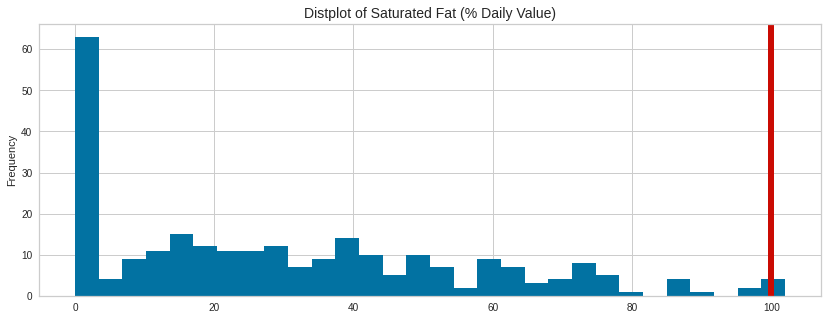

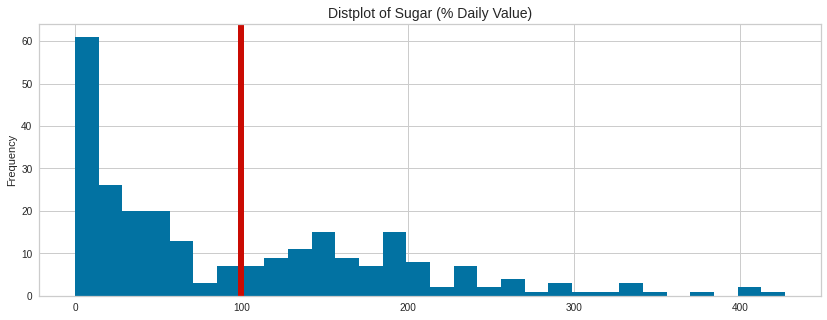

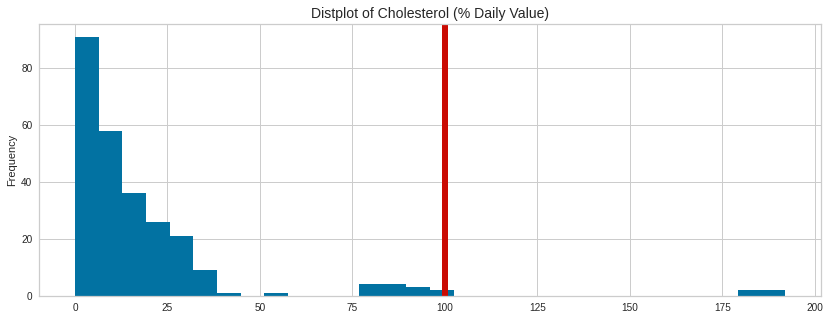

In [8]:
columns = ['Saturated Fat (% Daily Value)', 'Sugar (% Daily Value)', 'Cholesterol (% Daily Value)']

for column in columns:
    df[column].plot(kind = 'hist',bins = 30,figsize = (14,5))
    plt.axvline(x=100, color='r', label='axvline - full height',linewidth=6) #max allowed daily value (%)
    plt.title("Distplot of {}".format(column), fontsize = 14)
    plt.show()
    

Summary of plots distributions:

1. Saturated fat: Looks like (Saturated) fats are within the range of the daily value (0 - 100%).
2. Sugars: Sugars however significantly exceed the daily value! Some of foods have overwhelming 400% sugars of daily dose!
3. Cholesterol: most of foods have low cholesterol index

**The key takeaway:
Even though fats appear to be in acceptable range, the major concern for us is the combinaton of the fats with the considerably high levels of sugars. Later we will combine the sugars and fats together and cluster food items based on this combined fat-sugar value.**


Now lets examen food categories considering fat, sugar and cholesterol features

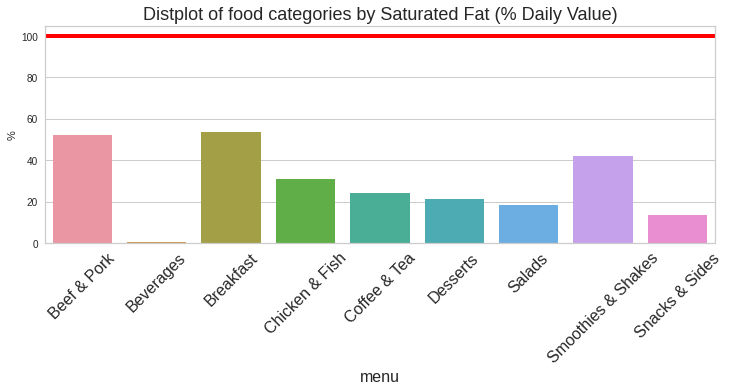

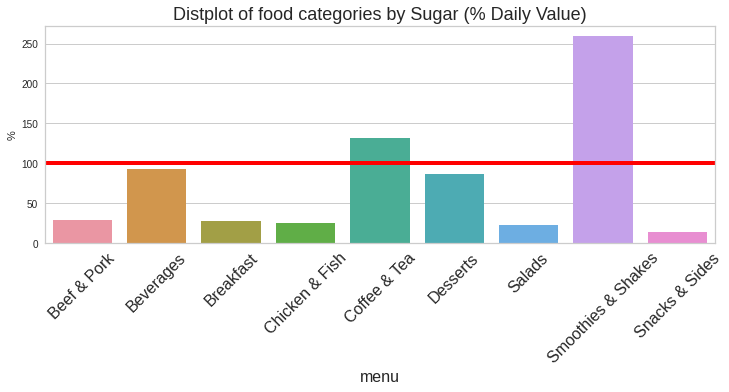

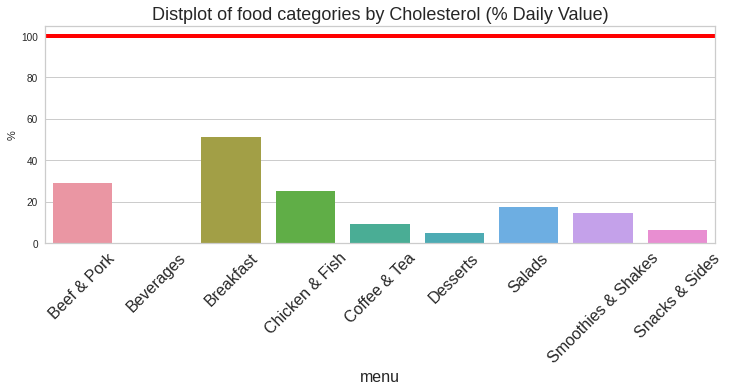

In [9]:
columns = ['Saturated Fat (% Daily Value)','Sugar (% Daily Value)', 'Cholesterol (% Daily Value)']

for column in columns:
    #plotting Saturated Fat (% Daily Value), Sugar (% Daily Value), Cholesterol (% Daily Value)
    plt.figure(figsize=(12,4))
    sns.barplot(x=df.groupby('Category')[column].mean().index,
                y=df.groupby('Category')[column].mean().values)
    plt.title("Distplot of food categories by {}".format(column), fontsize = 18)
    plt.ylabel("%")
    plt.xlabel("menu",fontsize = 16)
    plt.xticks(rotation=45, fontsize = 16)
    plt.axhline(y=100, color='red', linestyle='-', linewidth=4)
    plt.show()

Coffee & Tea, Smoothies & Shakes exceed the daily uptake of sugars posing a relative health concern. 

**Breakfast, Chicken & Fish, Beef & Pork items appear to be healthy though!**

<a class = 'anchor' id = 'Data_Clustering'></a>

# Data Clustering

In this dection we will continue with the data preprocessing by clustering fat and sugar containing items together and assigning the cluster category for each food item

In [10]:
df1 = df[['Category', 'Item', 'Saturated Fat (% Daily Value)', 'Sugar (% Daily Value)' ]]

In [11]:
df1.head()

,Category,Item,Saturated Fat (% Daily Value),Sugar (% Daily Value)
0,Breakfast,Egg McMuffin,25,10
1,Breakfast,Egg White Delight,15,10
2,Breakfast,Sausage McMuffin,42,7
3,Breakfast,Sausage McMuffin with Egg,52,7
4,Breakfast,Sausage McMuffin with Egg Whites,42,7


In [12]:
X = df1.iloc[:,[2,3]].values

The [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) implements the “elbow” method to allow data scientists choose the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

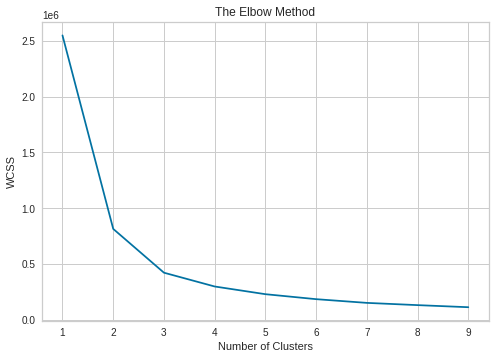

In [13]:

wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

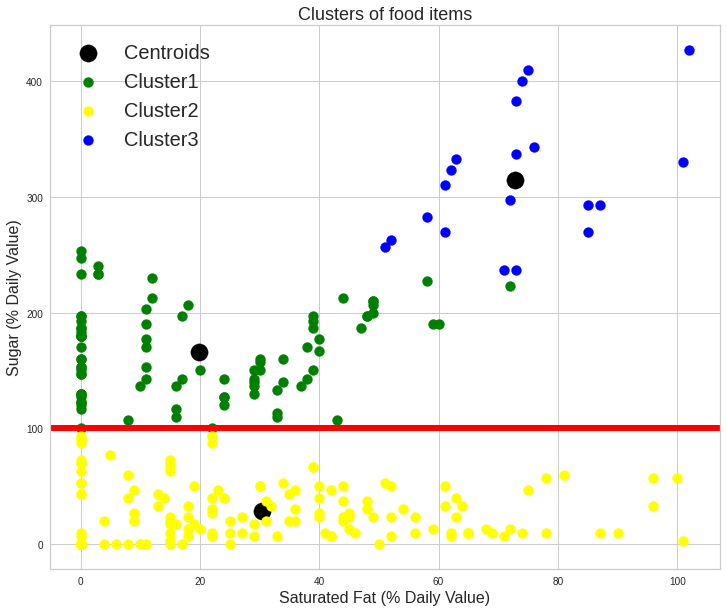

In [14]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
plt.figure(figsize=(12,10))
#Visualize the clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroids')

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='green',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='blue',label='Cluster3')



plt.title('Clusters of food items', fontsize = 18)
plt.xlabel('Saturated Fat (% Daily Value)', fontsize = 16)
plt.ylabel('Sugar (% Daily Value)',fontsize = 16)
plt.legend(fontsize = 20)
plt.axhline(y=100, color='red', linestyle='-', linewidth=6)

plt.show()

It looks like we are within the fat limit, however how is about the sugar?!
Here we obtained three clusters , which clearly show us that food related to the cluster 1 and 3 are among the least healthy. The cluster 2 however does not exceed the daily limit neither by sugars nor by fats, thus food is safe to eat.

<a class = 'anchor' id = 'Clustering_model_validation'></a>

# Clustering model validation

We will use the three most commonly used models to verify the number of cluster we have chosen.

1. [The Calinski-Harabasz Metric](https://www.mathworks.com/help/stats/clustering.evaluation.calinskiharabaszevaluation-class.html). 

This evaluation is an object consisting of sample data, clustering data, and Calinski-Harabasz criterion values used to evaluate the optimal number of clusters. 

2. [The Silhouette Coefficient](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

This evaluation is used by computing the density of clusters. The score is calculated by averaging the silhouette coefficient for each sample, obtained as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, 

3. [Intercluster Distance Maps](https://www.scikit-yb.org/en/stable/api/cluster/icdm.html)

This evaluation display the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space.

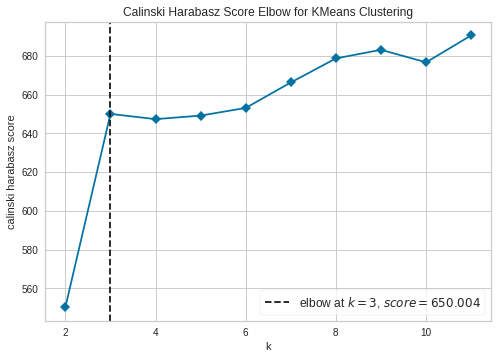

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [15]:
#Verify the number of clusters by the Calinski metrics
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

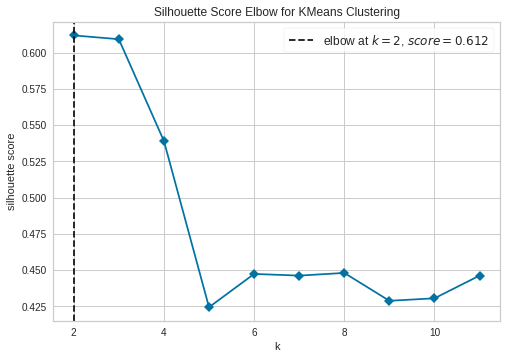

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
#Double check by the Silhouette score
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



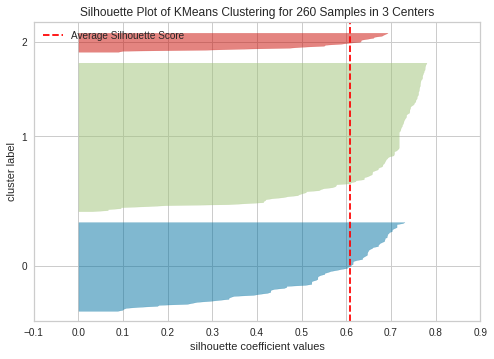

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 260 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

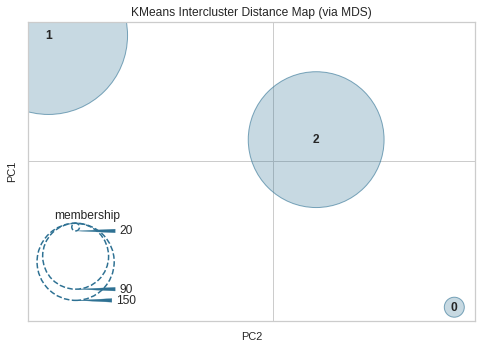

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [18]:
#Instantiate the clustering model and visualizer
model = KMeans(3)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

Because two clusters overlap in the 2D space, it does not imply that they overlap in the original [feature space](https://www.scikit-yb.org/en/stable/api/cluster/icdm.html)

In [19]:
df1.head()

,Category,Item,Saturated Fat (% Daily Value),Sugar (% Daily Value)
0,Breakfast,Egg McMuffin,25,10
1,Breakfast,Egg White Delight,15,10
2,Breakfast,Sausage McMuffin,42,7
3,Breakfast,Sausage McMuffin with Egg,52,7
4,Breakfast,Sausage McMuffin with Egg Whites,42,7


So, now we will cluster our data into 3 clusters and we will assing the separate column for the clusters

In [20]:
#assigning food items to corresponding cluster 1
df_1 = df1.loc[df1['Sugar (% Daily Value)'] < 101]
df_1['Clusters'] = 1

#assigning food items to corresponding cluster 2
Criteria_1 = df1['Sugar (% Daily Value)'] > 101
Criteria_2 = df1['Saturated Fat (% Daily Value)'] < 50
Criteria_all = Criteria_1 & Criteria_2
df_2 = df1[Criteria_all]
df_2['Clusters'] = 2

#assigning food items to corresponding cluster 3
Criteria_3 = df1['Sugar (% Daily Value)'] > 101
Criteria_4 = df1['Saturated Fat (% Daily Value)'] > 50
Criteria_all = Criteria_3 & Criteria_4
df_3 = df1[Criteria_all]
df_3['Clusters'] = 3

df_ready = df_1.append([df_2, df_3])

In [21]:
df_ready.head()

,Category,Item,Saturated Fat (% Daily Value),Sugar (% Daily Value),Clusters
0,Breakfast,Egg McMuffin,25,10,1
1,Breakfast,Egg White Delight,15,10,1
2,Breakfast,Sausage McMuffin,42,7,1
3,Breakfast,Sausage McMuffin with Egg,52,7,1
4,Breakfast,Sausage McMuffin with Egg Whites,42,7,1


In [22]:
df_ready.columns

Index(['Category', 'Item', 'Saturated Fat (% Daily Value)',
       'Sugar (% Daily Value)', 'Clusters'],
      dtype='object')

In [23]:
#extracting the critical features for the classification
df_ready_final = df_ready[['Saturated Fat (% Daily Value)', 'Sugar (% Daily Value)', 'Clusters']]

In [24]:
df_ready_final.head()

,Saturated Fat (% Daily Value),Sugar (% Daily Value),Clusters
0,25,10,1
1,15,10,1
2,42,7,1
3,52,7,1
4,42,7,1


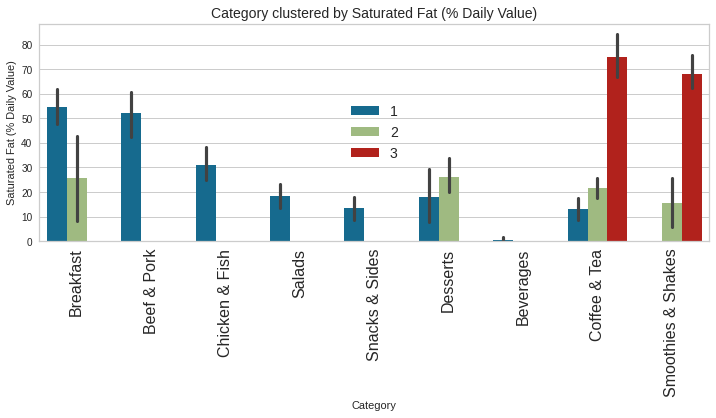

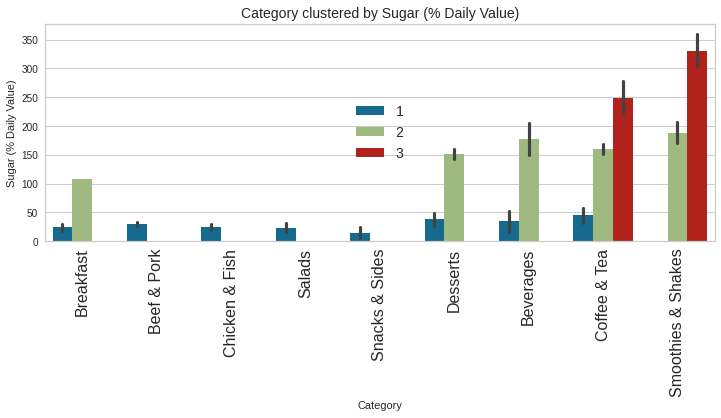

In [25]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x='Category',
                 y='Saturated Fat (% Daily Value)',
                 hue="Clusters", data=df_ready)
plt.xticks(rotation=90, fontsize=16)
plt.title('Category clustered by Saturated Fat (% Daily Value)', fontsize = 14)
ax.legend(loc=10, fontsize = 14)

plt.figure(figsize=(12,4))
ax = sns.barplot(x='Category',
                 y='Sugar (% Daily Value)',
                 hue="Clusters", data=df_ready)
plt.xticks(rotation=90, fontsize=16)
plt.title('Category clustered by Sugar (% Daily Value)', fontsize = 14)
ax.legend(loc=10, fontsize = 14)

<a class = 'anchor' id = 'Model_Building'></a>

# Model Building

In [26]:
#splitting the dataset, so no information leakage occurs
X_train, X_test, y_train, y_test = train_test_split(df_ready_final.drop(labels=['Clusters'], axis=1),
    df_ready_final['Clusters'], test_size=0.3, random_state=0)

#using SMOTE to balance the dataset
os = SMOTE(random_state=0, k_neighbors=2)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
X_test_os,y_test_os=os.fit_sample(X_test,y_test)
print("The number of y_train classes before fit {}".format(Counter(y_train)))
print("The number of y_train classes after fit {}".format(Counter(y_train_os)))
print("The number of y_test classes before fit {}".format(Counter(y_test)))
print("The number of y_test classes after fit {}".format(Counter(y_test_os)))

The number of y_train classes before fit Counter({1: 109, 2: 54, 3: 19})
The number of y_train classes after fit Counter({1: 109, 2: 109, 3: 109})
The number of y_test classes before fit Counter({1: 43, 2: 30, 3: 5})
The number of y_test classes after fit Counter({2: 43, 1: 43, 3: 43})


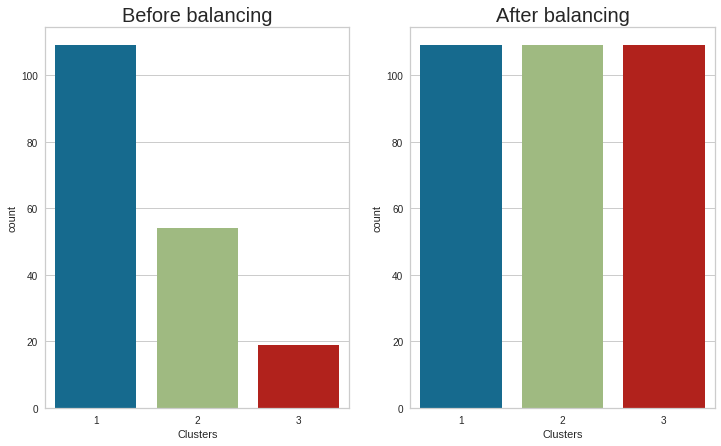

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

# before balancing
sns.countplot(y_train, ax=axes[0])
axes[0].set_title("Before balancing",  fontsize = 20)

# after balancing
sns.countplot(y_train_os, ax=axes[1])
axes[1].set_title('After balancing', fontsize = 20)

plt.show()

In this section we will compare the following multiclassification models:

1. KNeighborsClassifier
2. Random Forest
3. Neural Network
4. Deep Neural Network

In [28]:
estimators = {
    'KNeighborsClassifier' :[KNeighborsClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Neural Network' :[MLPClassifier()],
    'Deep Neural Network': [MLPClassifier(hidden_layer_sizes = [100]*5)],
}


def mfit(estimators, X_train_os, y_train_os):
    for m in estimators:
        estimators[m][0].fit(X_train_os, y_train_os)
        print(m+' fitted')

mfit(estimators, X_train_os, y_train_os)

KNeighborsClassifier fitted
Random Forest fitted
Neural Network fitted
Deep Neural Network fitted


In [29]:
def mpredict(estimators, X_test_os, y_test_os):
    outcome = dict()
    r_a_score = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test_os)
        #r_a_score[m] = roc_auc_score(y_test, y_pred)
        outcome[m] = [y_pred, confusion_matrix(y_pred,y_test_os), classification_report(y_pred,y_test_os)]
    return outcome, r_a_score

outcome, r_a_score = mpredict(estimators, X_test_os, y_test_os)
for m in outcome:
    print('------------------------'+m+'------------------------')
    print(outcome[m][1])
    print(outcome[m][2])

------------------------KNeighborsClassifier------------------------
[[43  0  0]
 [ 0 43  1]
 [ 0  0 42]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.98      1.00      0.99        42

    accuracy                           0.99       129
   macro avg       0.99      0.99      0.99       129
weighted avg       0.99      0.99      0.99       129

------------------------Random Forest------------------------
[[43  0  0]
 [ 0 43  0]
 [ 0  0 43]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        43

    accuracy                           1.00       129
   macro avg       1.00      1.00      1.00       129
weighted avg       1.00      1.00      1.00       129

------------------------Neural Ne

**Based on the confusion matrix the best model is Random Forest Classifier!**

In [30]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_os, y_train_os)
rf_predictions = rf_classifier.predict(X_test_os)

In [31]:
confusion_matrix(rf_predictions,y_test_os)

array([[43,  0,  0],
       [ 0, 43,  0],
       [ 0,  0, 43]])

<a class = 'anchor' id = 'Model_Evaluation'></a>

# Model Evaluation

Model_Evaluation¶
In this section we will examine the following classification visualizers:

1. Classification Report and Confusion Matrix
2. ROC/AUC curve
3. Class Prediction Error

For this section I will use the wonderful [yellowbrick library](https://www.scikit-yb.org/en/stable/index.html): these guys specialize onto the model evaluations of regression, classification, clustering, text cases and many more!

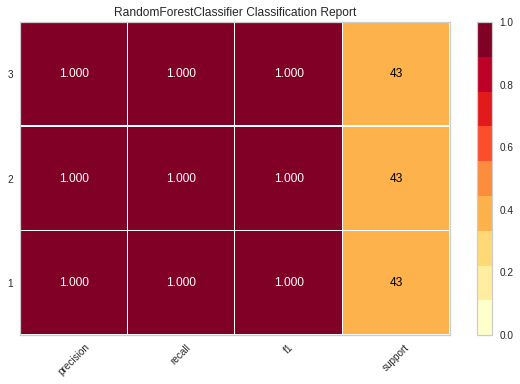

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [32]:
clf = RandomForestClassifier()
visualizer = ClassificationReport(clf,support=True)

visualizer.fit(X_train_os, y_train_os)        # Fit the visualizer and the model
visualizer.score(X_test_os, y_test_os)        # Evaluate the model on the test data
visualizer.show() 

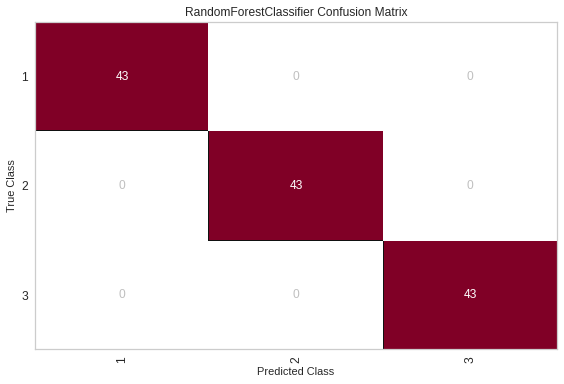

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
cm = ConfusionMatrix(clf)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_os, y_train_os)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_os, y_test_os)

# How did we do?
cm.show()


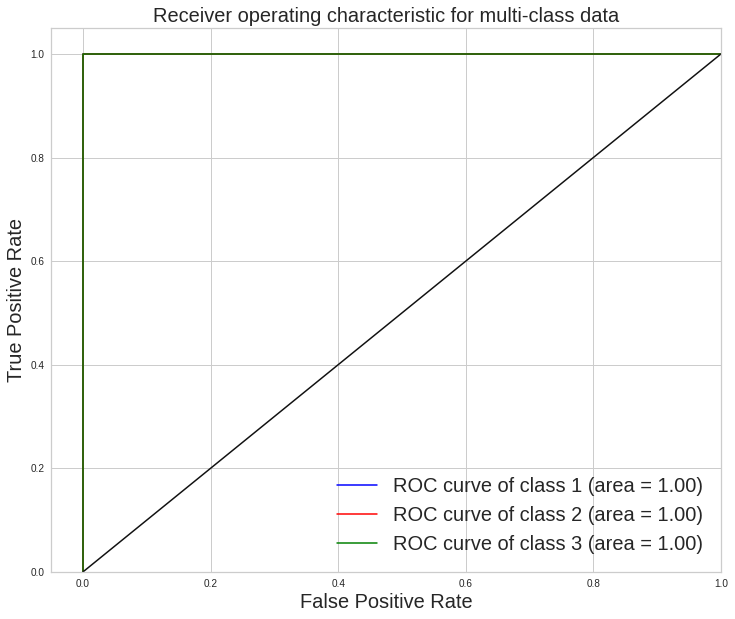

In [34]:
#We define the model as an SVC in OneVsRestClassifier setting.
#this means that the model will be used for class 1 vs class 2, class 2vs class 3 and
#class 1 vs class 3. So, we have 3 cases at #the end and within each case, 
#the bias will be varied in order to get the ROC curve of the given case - 3 ROC curves as output.

classifier = OneVsRestClassifier(RandomForestClassifier())
X = df_ready_final.drop('Clusters', axis = 1).to_numpy()
number_of_classes = df_ready_final['Clusters'].to_numpy()
y_bin = label_binarize(number_of_classes, classes=[1, 2, 3])
n_classes = y_bin.shape[1]

# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size= 0.5, random_state=0)


y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(12,10))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.
             format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic for multi-class data', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

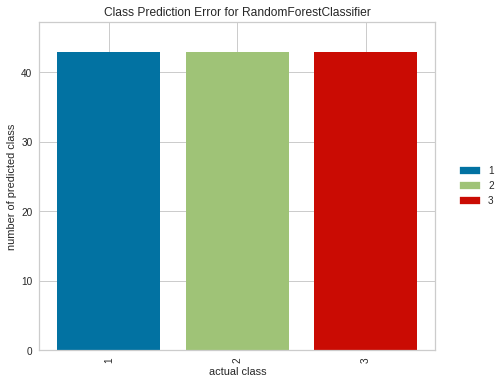

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [35]:
#Class Prediction Error
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10)
)

# Fit the training data to the visualizer
visualizer.fit(X_train_os, y_train_os)

# Evaluate the model on the test data
visualizer.score(X_test_os, y_test_os)

# Draw visualization
visualizer.show()

<a class = 'anchor' id = 'Deployment'></a>

# Deployment

[Cluster Mac food!](https://mcdonalds20.herokuapp.com/)